링크
https://scikit-learn.org/stable/modules/neighbors.html#neighbors

#### 라이브러리

In [1]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

#### 데이터정의

In [28]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X.shape

(6, 2)

Text(0, 0.5, 'Y-axis')

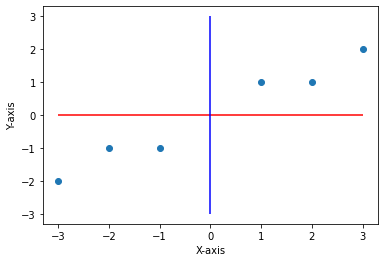

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1])
plt.hlines(0,-3,3,color="red")
plt.vlines(0,-3,3,color="blue")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

## 기본사용법

In [37]:
# 객체정의
alg_choice = ["auto","ball_tree","kd_tree","brute"] # auto : default 값
NN = NearestNeighbors(n_neighbors=2, algorithm=alg_choice[1]) 

# 학습데이터에 fit
NN.fit(X) 

NearestNeighbors(algorithm='ball_tree', n_neighbors=2)

In [27]:
# distances, indices 도출 --> n_neighbors = 2로 설정했기에, 자기자신과 가까운애 한개만 봄
distances, indices = NN.kneighbors(X)
print(distances,"\n") # 이웃값과 거리
print(indices) # indices = 이웃값의 인덱스

[[0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]] 

[[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]]


In [30]:
# 데이터들간의 neighbor 관계도 파악
NN.kneighbors_graph(X).toarray()

array([[1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1.]])

## 분류

라이브러리

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

데이터 및 변수정의

In [87]:
# 데이터로드
iris = datasets.load_iris()

# feature 두개만 사용
Xdata = iris.data[:, :2] # 150 x 2
ydata = iris.target # 150 x 1

# 변수정의
n_neighbors = 15
h = 0.02  # 메쉬의 step size

실행

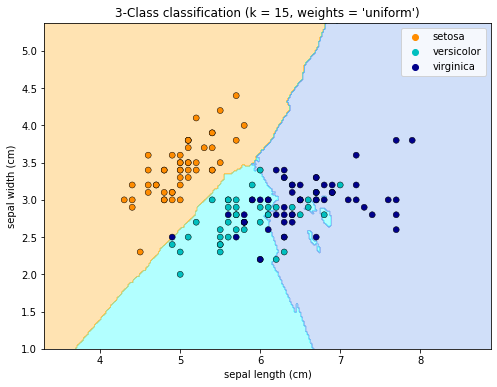

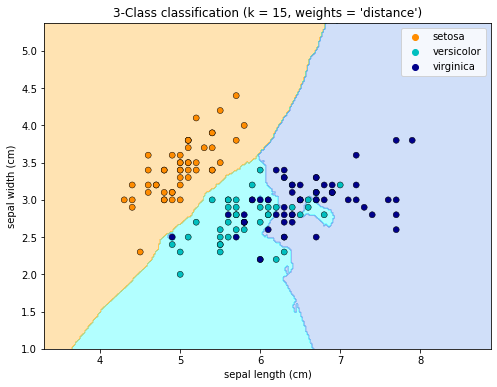

In [98]:
# Create color maps
cmap_area = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_scatter = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    
    # 객체정의 및 학습데이터에 fit
    KNNclf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    KNNclf.fit(Xdata, ydata)

    # 메시생성
    x_min, x_max = Xdata[:, 0].min() - 1, Xdata[:, 0].max() + 1 # 3.3~8.9
    y_min, y_max = Xdata[:, 1].min() - 1, Xdata[:, 1].max() + 1 # 1.0~5.4
    x_dim = np.arange(x_min, x_max, h) # (280,)
    y_dim = np.arange(y_min, y_max, h) # (220,)
    xx, yy = np.meshgrid(x_dim,y_dim) # 둘다 220 x 280

    concat_data = np.c_[xx.ravel(), yy.ravel()] # (61600,) x 2  ==> (61600,2)

    # 예측
    Z = KNNclf.predict(concat_data)

    # 영역 plot - 세개의 영역에 대한 색칠 
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_area, alpha=0.3)

    # 학습데이터 점 찍기
    sns.scatterplot(
        x=X[:, 0], 
        y=X[:, 1],
        hue=iris.target_names[ydata], # 분류값 지정 (인덱스 --> 0:setosa, 1:versicolor, 2:virginica)
        palette=cmap_scatter, # 위 분류값 순서에 따른 색깔 지정
        alpha=1.0,
        edgecolor="black",
    )
        
    # plt 설정
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

## 회귀

첫번째 x값에서의 이웃5개의 y값 평균 : 0.6036958028323319
weight 가 uniform일 때: 0.6036958028323319
weight 가 distance일 때: 0.4304806397191198


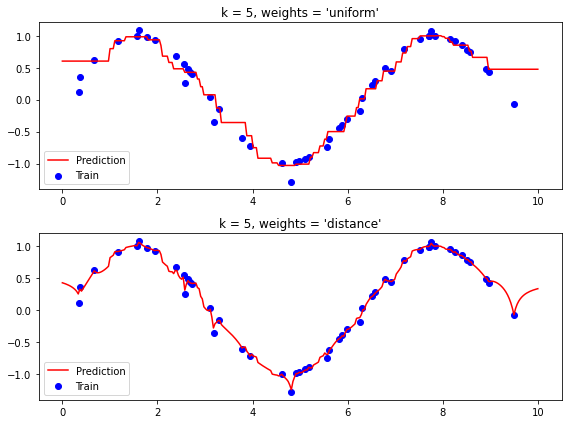

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

# 데이터생성
np.random.seed(20)
X = np.sort(10 * np.random.rand(50, 1), axis=0) # 0~10 까지의 50 x 1 랜덤 데이터생성
y = np.sin(X).ravel()

# y값에 노이즈추가 : 1차원배열이며, 5개당 한개씩 노이즈추가 (맨 좌측열)
y[::5] += 1 * (0.5 - np.random.rand(10))


# ----- 원리확인위함 -----
yy = [y[0],y[1],y[2],y[3],y[4]]
print(f'첫번째 x값에서의 이웃5개의 y값 평균 : {np.mean(yy)}')
# ------------------------


# 변수 지정
n_neighbors = 5
t = np.linspace(0, 10, 300)[:, np.newaxis] # 0~10 까지의 300개 (plot 하기 위함)



# 회귀 수행
plt.figure(figsize=[8,6])
for i, weights in enumerate(["uniform", "distance"]):
    KNNreg = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    KNNreg.fit(X, y)
    y_ = KNNreg.predict(t)
    
    # ----- 원리확인위함 -----
    if i==0:
        print(f'weight 가 uniform일 때: {y_[0]}')
    if i==1:
        print(f'weight 가 distance일 때: {y_[0]}')
    # ------------------------
    
    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="blue", label="Train")
    plt.plot(t, y_, color="red", label="Prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("k = %i, weights = '%s'" % (n_neighbors, weights))

plt.tight_layout()
plt.show() 